# __Predicting Airbnb Unlisting Project__ <img align='right' width='150' height='150' src='https://maiseducativa.com/wp-content/uploads/2015/02/Logo_Nova-IMS.jpg'>

## <font color='SeaGreen'>__Text Mining__</font><br>

> __Group O__ composed by:
>> __Daniel Franco, nº20210719__ <p>
>> __João Malho, nº20220696__ <p>

***

## 🧬 __Introduction__

__Your solution should present the following points:__

__1. Data Exploration (1.5 points):__

Here you should analyze the corpora and provide some conclusions and visual information (bar charts, word clouds, etc.) that contextualize the data.

__2. Data Preprocessing (2 points):__

You must apply a method to split your training corpus into train/validation sets to evaluate the performance of your model (you can also resort to KFold cross validation, or other methods). Moreover, you must correctly implement and experiment at least four (4) of the data preprocessing techniques shown in class (stop words, regular expressions, lemmatization, stemming, etc.).

__3. Feature Engineering (5 points):__

You must correctly implement and experiment with two (2) of the feature engineering techniques seen in class (TF-IDF, GloVe embeddings, etc.).

__4. Classification Models (4.5 points):__

You must correctly implement and test three (3) of the classification algorithms seen in class (KNN, LR, MLP, LSTM, etc.). 

__5. Evaluation (1.5 points):__

You must evaluate your models resorting, at least, to Recall, Precision, Accuracy and F1-Score.
Moreover, the development of extra work (more techniques than the minimum required in the previous points and/or techniques not shown in class) is highly recommended and will account for a maximum of 4.5 points divided as follows:
    
>__1. Data Preprocessing__ – 0.25 points for each extra method (unseen in class) used (maximum of 2 extra methods).

>__2. Feature Engineering__ – 1 point for each extra method using Transformed-based embeddings (maximum of 2 extra methods)

>__3. Classification Models__ – 1 point for each extra


## 📖 __Glossary__

__The data is divided in following sets:__

* __Train (train.xlsx) (12,496 lines):__

> Contains the Airbnb and host descriptions (“description” and “host_about” columns), as well as the information regarding the property listing status (“unlisted” column). A property is considered unlisted (1) if it got removed from the quarterly Airbnb list and it is considered listed (1) if it remains on that same list.

* __Train Reviews (train_reviews.xlsx) (72,1402):__ 

> This file has all the guests’ comments made to each Airbnb property. Note that there can be more than one comment per property, not all properties have comments, and comments can appear in many languages!

* __Test (test.xlsx) (1,389 lines):__

> The structure of this dataset is the same as the train set, except that it does not contain the “unlisted” column. The teaching team is keeping this information secret! You are expected to provide the predicted status (0 or 1) for each Airbnb in this set. Once the projects are delivered, we will compare your predictions with the actual (true) labels.

* __Test Reviews (test_reviews.xlsx) (80,877):__ 

> The structure of this dataset is the same as the train reviews set, but the comments correspond to the properties present on the test set

***

## 📈 __Methodology__


***
## 👨🏻‍💻 __Code Changes__



### __1. Libraries and Data import__

In [66]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\joaom\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\joaom\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\joaom\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [67]:
corpora_test = pd.read_excel('test.xlsx') 
corpora_train = pd.read_excel('train.xlsx') 
corpora_test_review = pd.read_excel('test_reviews.xlsx')
corpora_train_review = pd.read_excel('train_reviews.xlsx')

## 1. Data Exploration 
* data presentation and explanation of the main finding from the exploratory analysis (accounts for 50% of criteria 4.1).

In [68]:
# Check data information
corpora_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1389 entries, 0 to 1388
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        1389 non-null   int64 
 1   description  1389 non-null   object
 2   host_about   1389 non-null   object
dtypes: int64(1), object(2)
memory usage: 32.7+ KB


In [69]:
corpora_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12496 entries, 0 to 12495
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        12496 non-null  int64 
 1   description  12496 non-null  object
 2   host_about   12496 non-null  object
 3   unlisted     12496 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 390.6+ KB


In [70]:
corpora_test_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80877 entries, 0 to 80876
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     80877 non-null  int64 
 1   comments  80877 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.2+ MB


In [71]:
corpora_train_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721402 entries, 0 to 721401
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   index     721402 non-null  int64 
 1   comments  721398 non-null  object
dtypes: int64(1), object(1)
memory usage: 11.0+ MB


In [72]:
corpora_train.head(2)

,index,description,host_about,unlisted
0,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0
1,2,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1


In [73]:
corpora_test.head(2)

,index,description,host_about
0,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de..."
1,2,"IMPORTANT: In response to COVID-19, this prope...",We are the be@home Team!\n\nYou can count on u...


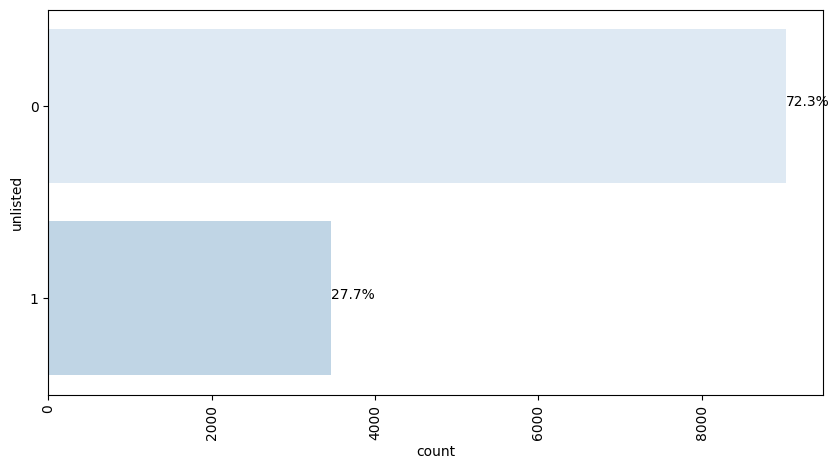

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)

blue_palette = sns.color_palette("Blues")
# Plot the countplot
ax = sns.countplot(y="unlisted", data=corpora_train, palette=blue_palette)

# Calculate the percentage for each category
total = len(corpora_train)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width() / total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y))

plt.show()


__After data analysis can be noted that:__

> File `corpora_train_review`:
__Features__:

1. __[index]__ - (Int) Index correspondency with Index in file `corpora_train`
2. __[comments]__ - (Str) Each comment per line


> File `corpora_test_review`:
__Features__:

1. __[index]__ - (Int) Index correspondency with Index in file `corpora_test`
2. __[comments]__ - (Str) Each comment per line


> File `corpora_train`:
__Features__:

1. __[index]__ - (Int) Index correspondency
2. __[description]__ - (Str) Description of the asset
3. __[host_about]__ - (Str) Description of the asset host
4. __[unlisted]__ - (Bool) Is asset unlisted or not 

> File `corpora_test`:
__Features__:

1. __[index]__ - (Int) Index correspondency
2. __[description]__ - (Str) Description of the asset
3. __[host_about]__ - (Str) Description of the asset host


Is also noted that train data is not balanced, model will be train with ~28% of unlisted individuals.

## 2. Data Preprocessing 
* explanation of the different preprocessing methods developed (accounts for 25% of criteria 4.Erro! A origem da referência não foi encontrada.).

__Data Cleaning:__

* __Lowercase text__
> Converting everything to lowercase reducing vocabulary size

* __Remove Numerical Data and Punctuation__
> Normalize Dates and Numbers

* __Remove Stop Words__
> Removing words that are not very informative. Less tokens same meaning.

* __Lemmatize__
> Turning words into their root word

* __Stemmer__
> Remove last few characters to obtain the shorter form of each word

***

In [75]:
# Data Pre Processing

stop = stopwords.words('english')
lemma = WordNetLemmatizer()

def pre_process(text_list, lemmatize, stemmer):
    
    updates = []
    
    for j in tqdm(text_list):
        
        text = j
        # Tokenize the text
        text = word_tokenize(text)
        
        # Join the tokens back into a single string
        text = ' '.join(text)
        
        # Lowercase text
        text = text.lower()
        
        # Remove tags
        text = re.sub("&lt;/?.*?&gt;", " &lt;&gt; ", text)
        
        # Remove special characters and digits
        text = re.sub("[^a-zA-Z]", " ", text)
        text = re.sub("br", "", text)
        text = re.sub("(\\d|\\W)+", " ", text)
        
        # Remove stopwords
        text = " ".join([word for word in text.split() if word not in stop])
        
        # Lemmatize
        if lemmatize:
            text = " ".join(lemma.lemmatize(word) for word in text.split())
        
        # Stemming
        if stemmer:
            stemmer = SnowballStemmer('english')
            text = " ".join(stemmer.stem(word) for word in text.split())
            
        updates.append(text)
        
    return updates

corpora_train['description_clean'] = pre_process(corpora_train['description'], lemmatize=True, stemmer=True)


100%|██████████| 12496/12496 [00:52<00:00, 237.54it/s]


In [76]:
corpora_train['host_about_clean'] = pre_process(corpora_train['host_about'], lemmatize=True, stemmer=True)


100%|██████████| 12496/12496 [00:31<00:00, 401.51it/s]


In [77]:
corpora_test['description_clean'] = pre_process(corpora_test['description'], lemmatize=True, stemmer=True)


100%|██████████| 1389/1389 [00:06<00:00, 229.69it/s]


In [78]:
corpora_test['host_about_clean'] = pre_process(corpora_test['host_about'], lemmatize=True, stemmer=True)


100%|██████████| 1389/1389 [00:03<00:00, 372.60it/s]


In [79]:
corpora_test_review['comments_clean'] = pre_process(corpora_test_review['comments'], lemmatize=True, stemmer=True)


100%|██████████| 80877/80877 [02:22<00:00, 567.89it/s]


In [80]:
corpora_train_review['comments_clean'] = pre_process(corpora_train_review['comments'], lemmatize=True, stemmer=True)


  7%|▋         | 51779/721402 [01:31<17:25, 640.38it/s]

## 3. Feature Engineering
* description of the methods implemented (accounts for 25% of
criteria 4.3)

## 4. Classification Models
* description of the models implemented (accounts for 25% of criteria 4.4)